In [2]:
import Pkg 

In [ ]:
Pkg.add("AbstractAlgebra")

In [ ]:
Pkg.add("Random")

In [ ]:
Pkg.add("Permutations")

In [ ]:
Pkg.add("CairoMakie")

In [21]:
using AbstractAlgebra, Random, Permutations
b=7
F = GF(b)
m = 3
s = 2
ρ = m 
t = m - ρ 
N = b^m

343

In [22]:
badic = collect(Iterators.product(fill(0:b-1, m)...))[:]

343-element Vector{Tuple{Int64, Int64, Int64}}:
 (0, 0, 0)
 (1, 0, 0)
 (2, 0, 0)
 (3, 0, 0)
 (4, 0, 0)
 (5, 0, 0)
 (6, 0, 0)
 (0, 1, 0)
 (1, 1, 0)
 (2, 1, 0)
 ⋮
 (5, 5, 6)
 (6, 5, 6)
 (0, 6, 6)
 (1, 6, 6)
 (2, 6, 6)
 (3, 6, 6)
 (4, 6, 6)
 (5, 6, 6)
 (6, 6, 6)

In [3]:
function norm_coord(v,b)
    v_1 = 0.0
    bf = float(b)
    for i in eachindex(v)
        v_1 += v[i] * bf^(-i)
    end
    return v_1
end


norm_coord (generic function with 1 method)

In [4]:
using Test
@test norm_coord([1 1 0 1],2) == 13/16

Test Passed

In [5]:
# norm_coord( AbstractAlgebra.lift.( C_2*collect(badic[4]) ),2)  # you need to convert Tuples to vectors matrix mult...
# C_r2*collect(badic[4])

# Hi Vishnu:   Ok, it is kind of logical: If you compute in a finite field, you need to apply the map from Fq to R to make this computation
# work. This map is called 'lift'. So, you need to apply lift to the vector you want to compute with.

In [23]:
function point_gen(C,n,b)
    v = [norm_coord(AbstractAlgebra.lift.(c*n),b) for c in C]  # you need to apply lift here! Like this? yes! Yay now the plot looks correct! Juhu! 
    return v
end

point_gen (generic function with 1 method)

In [24]:
function gen_all_points(C,b)
    badic = collect(Iterators.product(fill(0:b-1, m)...))[:]
    pts = [point_gen(C,collect(n),b) for n in badic]
    return pts
end

gen_all_points (generic function with 1 method)

In [25]:
vol(z) = prod(z)
vol_h(z, pts) = count( all(p .< z) for p in pts ) / length(pts)
δ(z,pts) = vol_h(z, pts) - vol(z)

δ (generic function with 1 method)

In [26]:
function is_NNLD(c_z, s, pts)
    NNLD = true
    for i in 1:c_z 
        z = rand(s)
        if δ(z,pts) < 0
            @show z
            NNLD = false
            break
        end
    end
    return NNLD
end


is_NNLD (generic function with 1 method)

In [33]:

C_1 = [[1 1 2];[3 5 2]; [1 3 4]]
C_2 = [[1 5 0]; [5 5 4]; [3 1 4]]
C_1, C_2 = F.(C_1), F.(C_2)
C = [C_1,C_2]

2-element Vector{Matrix{AbstractAlgebra.GFElem{Int64}}}:
 [1 1 2; 3 5 2; 1 3 4]
 [1 5 0; 5 5 4; 3 1 4]

In [34]:
gen_all_points(C,b)
pts = gen_all_points(C,b)

343-element Vector{Vector{BigFloat}}:
 [0.0, 0.0]
 [0.2069970845481049434057274627463129945681430399417877197265625, 0.2536443148688046485099423232867366095888428390026092529296875]
 [0.413994169096209886811454925492625989136286079883575439453125, 0.364431486880466451276638917278205553884617984294891357421875]
 [0.4781341107871719844739366589436713184113614261150360107421875, 0.454810495626822131921829228673459510901011526584625244140625]
 [0.68513119533527692787966412168998431297950446605682373046875, 0.7084548104956267804317715519601961204898543655872344970703125]
 [0.7492711370262390255421458551410296422545798122882843017578125, 0.7988338192419824610769618633554500775062479078769683837890625]
 [0.956268221574343968947873317887342636822722852230072021484375, 0.90962099125364426384365845734691902180202305316925048828125]
 [0.2536443148688046485099423232867366095888428390026092529296875, 0.8192419825072885818974255389690597439766861498355865478515625]
 [0.317784256559766746172424056737

In [35]:
#Fibo sequence is not NNLD!
is_NNLD(50, 2, pts)

z = [0.5628035008098871, 0.034353837574531365]


false

In [36]:
using CairoMakie
set_theme!(theme_ggplot2())

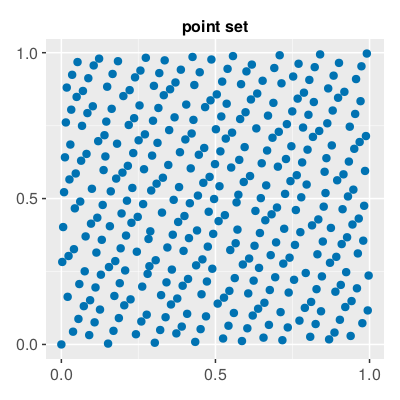

In [37]:
fig = Figure(resolution = (400, 400))
ax = Axis(fig[1,1], title = "point set")
scatter!( Point2.(pts) )

# ax = Axis(fig[1,2], title = "reduced point set")
# scatter!( Point2.(pts_r) )
fig

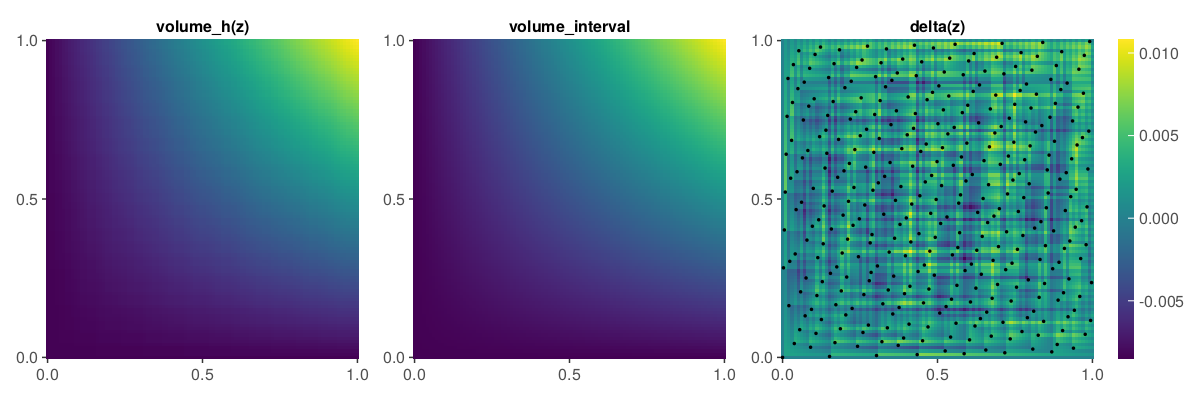

In [38]:
x = LinRange(0,1,100)
y = LinRange(0,1,100)
fig = Figure(resolution = (1200, 400))
ax = Axis(fig[1,1], title="volume_h(z)")
A = [vol_h((a,b),pts[1:end]) for a in x, b in y]
heatmap!(x,y, A )

ax = Axis(fig[1,2], title = "volume_interval")
B = [a*b for a in x, b in y]
heatmap!(x,y, B )

ax = Axis(fig[1,3], title = "delta(z)")
hm = heatmap!(x,y, A-B )
scatter!( Point2.(pts), color = :black, markersize = 5 )
Colorbar(fig[1,4], hm)
fig